In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import odr
from shapely.geometry import Point, LineString

https://stackoverflow.com/questions/78309370/perpendicular-residuals-with-scipy-odr

In [2]:
def model(B, x):
    return B[2] * x ** 2 + B[1] * x + B[0]

In [3]:
np.random.seed(12345)
x = np.linspace(0, 1, 20)
y = model([0.1, 0.2, 1.], x)
sx = 0.1 * np.ones_like(x)
sy = 0.2 * np.ones_like(x)
x += sx * np.random.normal(size=x.size)
y += sy * np.random.normal(size=x.size)

In [4]:
regressor = odr.Model(model)
data = odr.RealData(x, y, sx=sx, sy=sy)
solver = odr.ODR(data, regressor, beta0=[1., 1., 1.])
solution = solver.run()

In [5]:
xlin = np.linspace(-0.2, 1.1, 200)

In [6]:
ylin = model(solution.beta, xlin)

In [7]:
fit = LineString([(x, y) for x, y in zip(xlin, ylin)])

In [8]:
point = Point(x[1], y[1])

In [9]:
distances = np.array([
    fit.distance(Point(x, y))
    for x, y in zip(x, y)
])

In [10]:
distances

array([0.28101353, 0.03419364, 0.26473306, 0.2580743 , 0.12143476,
       0.04116252, 0.14389182, 0.17701173, 0.06717896, 0.16068763,
       0.04650308, 0.1186231 , 0.19456623, 0.11491941, 0.11564005,
       0.02492354, 0.1378421 , 0.08215034, 0.20314288, 0.07182371])

In [11]:
projected = [
    fit.interpolate(fit.project(Point(x, y)))
    for x, y in zip(x, y)
]
projected = np.array([[p.x, p.y] for p in projected])

In [12]:
location = fit.project(point, normalized=False)
projection = fit.interpolate(location)

In [13]:
fit.distance(point)

0.03419364398632701

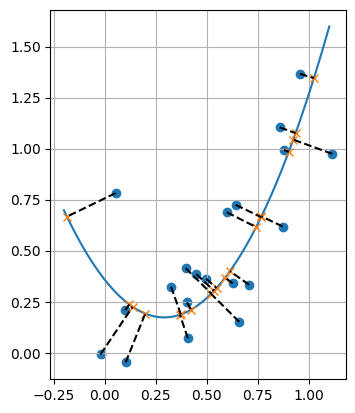

In [14]:
fig, axe = plt.subplots()
axe.scatter(x, y)
axe.plot(xlin, ylin)
axe.plot(*projected.T, linestyle="none", marker="x")
for i in range(x.size):
    axe.plot([x[i], projected[i][0]], [y[i], projected[i][1]], "--", color="k")
axe.grid()
axe.set_aspect("equal")